Use 'basic' building physics calculations to show ideal thicknesses of materials (concrete, timber wall etc.) for daily or multi-day, or hourly buffer for spikes and diurnal natural changes in temperatures.

Insert graphs showing time on x axis and temperature on y as a factor of 1. Then show for concrete different material depths (assuming symmetry). The graphs will be for hourly swings, another for daily and annual.
Other graphs for other materials.

In [45]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [183]:
def temperature_in_material(x_position, t_time, T0_average_temp,
    A_amplitude_temp, period_temp_fluctuations,
    lambda_mat, density_mat, heat_capacity_mat):
    w = (2*math.pi)/period_temp_fluctuations
    a = lambda_mat/(density_mat * heat_capacity_mat)
    return T0_average_temp + A_amplitude_temp * math.exp(-x_position*math.sqrt(w/(2*a))) * math.sin(w * t_time - (x_position / (math.sqrt(2*a*w))))
    
# def x_distance_minimum():
    # distance for a specific temperature minimum (used for finding distance maintaning a certain temperature such as water supply pipe)

def x_out_of_phase(lambda_mat, density_mat, heat_capacity_mat, period_temp_fluctuations):
    a = lambda_mat/(density_mat * heat_capacity_mat)
    return (math.pi/2 - math.pi/(2*period_temp_fluctuations)) * math.sqrt((4*math.pi*a)/period_temp_fluctuations)
print(x_out_of_phase(2, 2000, 1000, 24*3600))

1.894361728803767e-05


In [ ]:
# for i in range(0,100):
#     print(temperature_in_material(1, 3600*24*i, 10, 15, (365*24*3600), 0.92, 1780, 840))

In [ ]:
# concrete: 1, 2400, 880
# Timber: 0.24, 670, 1200

16
0.16
-0.9995630289130651
-0.9995630289130651


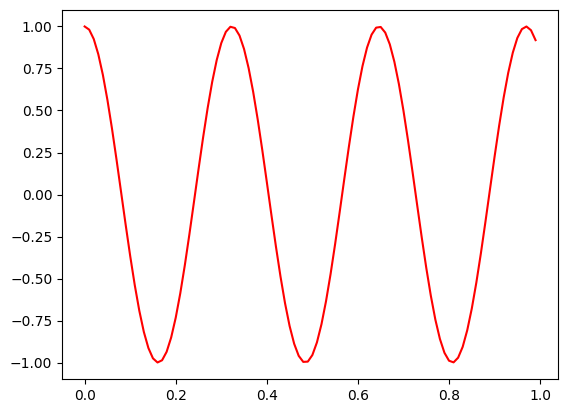

In [210]:
high = 1
gran = 100

sine_values = []
for i in np.linspace(0,high,gran,endpoint=False):
    a = 2 / (2000*1000)
    w = (2*math.pi)/(24*3600)
    sine_values.append(math.sin((w * 24*3600*0.25 - (i / (math.sqrt(2*a*w))))))
    


print(sine_values.index(min(sine_values)))
print(high/gran*sine_values.index(min(sine_values)))
print(sine_values[sine_values.index(min(sine_values))])
print(min(sine_values))

plt.plot(np.linspace(0,high,gran,endpoint=False),sine_values, 'r')
plt.show()

In [134]:
print(np.linspace(0,1,1000))

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

In [37]:
# find where at same t, x=0 is maximum and x=i is minimum
max_outside = temperature_in_material(0.00, (24*3600*0.25), 0, 1, (24*3600), 2, 2000, 1000)

min_occured_time = []
for i in np.linspace(0,0.5,100):
    #find minimum of each, then check distance to t=0.25
    temp_values = []
    for time_of_graph in range(1000):
        y = temperature_in_material(i, time_of_graph, 0, 1, (24*3600), 2, 2000, 1000)
        temp_values.append(y)
    min_occured_time.append(min(temp_values))

# then find index of value in min_occured_time closest to 0.25p

print(min_occured_time.index([24*3600*0.25 - item for item in min_occured_time].index(min([24*3600*0.25 - item for item in min_occured_time]))))

print(max_outside)

ValueError: 1 is not in list

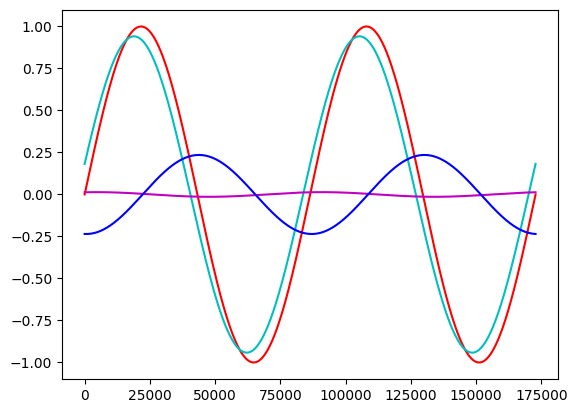

In [193]:
# 100 linearly spaced numbers
x = np.linspace(0,24*3600*2,1000)

# the functions, which are y = sin(x) and z = cos(x) here
y00001 = [temperature_in_material(0.00, item, 0, 1, (24*3600), 2, 2000, 1000) for item in x]
y001 = [temperature_in_material(0.01, item, 0, 1, (24*3600), 2, 2000, 1000) for item in x]
y010 = [temperature_in_material(0.71, item, 0, 1, (24*3600), 2, 2000, 1000) for item in x]
y025 = [temperature_in_material(0.24, item, 0, 1, (24*3600), 2, 2000, 1000) for item in x]

# setting the axes at the centre
fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plot the functions
plt.plot(x,y00001, 'r', label='y=sin(x)')
plt.plot(x,y001, 'c', label='y=sin(x)')
plt.plot(x,y010, 'm', label='y=cos(x)')
plt.plot(x,y025, 'b', label='y=cos(x)')

# plt.legend(loc='upper left')

# show the plot
plt.show()